# Loading packages

In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from os import path
from os.path import abspath, join
import pandas as pd
import re
from Bio.KEGG import REST
from tqdm.notebook import tqdm

In [2]:
from scipy import stats
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles

In [3]:
import plotly.express as px

In [4]:
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import _parse_sample

In [5]:
plt.rcParams['svg.fonttype'] = 'none'

In [6]:
precise1k = load_json_model("../jsons/precise1k_pub.json")

# PRECISE1K36 ICA Object generation

In [7]:
new_sample_table = pd.read_csv('../new_runs/precise1k36/sample_table.csv',index_col=0)

In [8]:
new_data_tpm = pd.read_csv('../new_runs/precise1k36/log_tpm.csv',index_col=0)

In [9]:
gene_table=pd.read_csv("../raw_data/MG1655_gene_info.csv", index_col=0)

In [54]:
#M matrix renamed as S matrix

ica_data_1k36 = IcaData(M = '../new_runs/precise1k36/375/M_375.csv',
                   A = '../new_runs/precise1k36/375/A_375.csv',
                   X = '../new_runs/precise1k36/log_tpm_norm.csv',
                   log_tpm = new_data_tpm,
                   gene_table = precise1k.gene_table,
                   sample_table = new_sample_table,
                   trn = precise1k.trn
                  )

  0%|          | 0/39 [00:00<?, ?it/s]

600

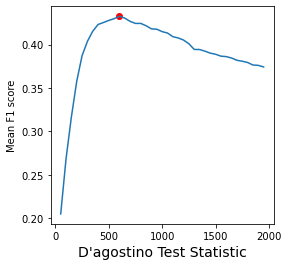

In [55]:
ica_data_1k36.reoptimize_thresholds()

# iModulon naming

## Comparison with PRECISE-1K

Use the same iModulon names with PRECISE-1K if they are conserved

In [56]:
dots,links = compare_ica(ica_data_1k36.M, precise1k.M, cutoff=0.7)
dots

[(0, 'Resistance', 0.9202633838807089),
 (1, 'SSW SNPs', 0.9584676459607423),
 (3, 'Galactose', 0.7708140850595322),
 (4, 'NtrC-1', 0.9149496306084481),
 (5, 'ROS TALE Amp', 0.9411701849405535),
 (6, 'crp KO-1', 0.9463816527170521),
 (7, 'cyoB/kdpE/qseB KO', 0.9555039778235659),
 (8, 'Rhamnose', 0.978320299810021),
 (9, 'IS1', 0.8908794755410951),
 (10, 'FlhDC-1', 0.9348634889061785),
 (11, 'Nucleoside', 0.916140455205316),
 (13, 'Molybdenum', 0.8603216238388652),
 (14, 'ykgR', 0.9000481939947561),
 (15, 'Lysine/T2SS', 0.9173578598770203),
 (16, 'EvgA', 0.9784741608389441),
 (19, 'cyoB/ndh/nuoB KO-1', 0.9176608160637326),
 (21, 'Hot TALE 16', 0.8190026261741177),
 (22, 'thrA KO', 0.8412046641987784),
 (24, 'trxC Del', 0.8900539858833215),
 (25, 'DhaR', 0.8417975260036936),
 (26, 'Membrane', 0.9255751840198035),
 (27, 'pgi KO', 0.9311972512971854),
 (28, 'Sulfoquinovose', 0.9749414029227003),
 (29, 'yceO', 0.8168079204781438),
 (30, 'arcA/luxS KO', 0.9335475937864925),
 (31, 'Thiamine-1

In [57]:
connectivity=pd.DataFrame(dots, columns=['precise1k36','precise1k','R'])

In [58]:
print(str(len(connectivity.precise1k36.unique())),"of",str(ica_data_1k36.imodulon_table.index.size) ,"have similarities to precise1k")

191 of 247 have similarities to precise1k


In [59]:
connectivity

,precise1k36,precise1k,R
0,0,Resistance,0.920263
1,1,SSW SNPs,0.958468
2,3,Galactose,0.770814
3,4,NtrC-1,0.914950
4,5,ROS TALE Amp,0.941170
...,...,...,...
186,232,pts KO,0.883167
187,235,crp KO-2,0.831520
188,236,Efflux Pump,0.860198
189,237,UC-9,0.830199


In [60]:
for i in connectivity.precise1k36:
    new_name = connectivity[connectivity.precise1k36 == i].precise1k.to_list()[0]
    ica_data_1k36.rename_imodulons({i:new_name})
    ica_data_1k36.imodulon_table.loc[new_name,'precise1k'] = True

# TRN enrichment

In [61]:
ica_data_1k36.compute_trn_enrichment(save=True, fdr=.0001)

/opt/anaconda3/envs/pymodulon/lib/python3.10/site-packages/pymodulon/core.py:610: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  keep_cols = self.imodulon_table.loc[


,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,Galactose,GalR,7.613968e-22,6.091174e-21,0.800000,0.800000,0.800000,8.0,10.0,10.0,1.0
1,Galactose,GalS,7.613968e-22,6.091174e-21,0.800000,0.800000,0.800000,8.0,10.0,10.0,1.0
2,Galactose,HU,1.070937e-09,5.711666e-09,0.400000,0.500000,0.444444,4.0,8.0,10.0,1.0
3,Galactose,RpoS,1.394420e-06,5.577680e-06,0.700000,0.021538,0.041791,7.0,325.0,10.0,1.0
4,Galactose,Crp,2.377492e-06,7.607974e-06,0.800000,0.014733,0.028933,8.0,543.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
435,UC-9,Crp,4.204073e-06,2.102036e-05,1.000000,0.011050,0.021858,6.0,543.0,6.0,1.0
436,UC-9,RhaS,2.477525e-05,9.290718e-05,0.333333,0.333333,0.333333,2.0,6.0,6.0,1.0
437,242,SlyA,1.473209e-10,4.419628e-10,1.000000,0.104167,0.188679,5.0,48.0,5.0,1.0
438,242,Crp,3.322624e-05,4.983936e-05,1.000000,0.009208,0.018248,5.0,543.0,5.0,1.0


In [62]:
reg_entries = ica_data_1k36.imodulon_table[ica_data_1k36.imodulon_table.regulator.notnull()]
reg_entries

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,precise1k
Galactose,GalR,7.613968e-22,6.091174e-21,0.800000,0.800000,0.800000,8.0,10.0,10.0,1.0,True
NtrC-1,NtrC,1.646596e-26,3.457851e-25,0.750000,0.300000,0.428571,15.0,50.0,20.0,1.0,True
cyoB/kdpE/qseB KO,HprR,3.800212e-12,3.040169e-11,0.625000,0.416667,0.500000,5.0,12.0,8.0,1.0,True
Rhamnose,RhaS,3.399379e-18,4.079255e-17,0.750000,1.000000,0.857143,6.0,6.0,8.0,1.0,True
FlhDC-1,FlhDC,4.241576e-28,9.755625e-27,0.703704,0.234568,0.351852,19.0,81.0,27.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...
pts KO,Cra,3.118342e-11,2.806508e-10,1.000000,0.076923,0.142857,6.0,78.0,6.0,1.0,True
crp KO-2,GlpR,6.499272e-14,7.799127e-13,0.833333,0.555556,0.666667,5.0,9.0,6.0,1.0,True
UC-9,RhaR,1.655831e-06,1.241873e-05,0.333333,1.000000,0.500000,2.0,2.0,6.0,1.0,True
242,SlyA,1.473209e-10,4.419628e-10,1.000000,0.104167,0.188679,5.0,48.0,5.0,1.0,NaN


In [63]:
my_list=[]

for i in ica_data_1k36.imodulon_table.index:
    if(type(i)==int):
        my_list.append(i)

print(my_list)

[2, 12, 17, 18, 20, 23, 41, 44, 47, 52, 54, 68, 70, 71, 74, 83, 88, 115, 117, 120, 127, 131, 136, 140, 142, 143, 145, 154, 168, 171, 172, 181, 183, 184, 187, 191, 198, 206, 210, 220, 222, 225, 226, 228, 230, 231, 233, 234, 238, 239, 240, 241, 242, 243, 244, 245]


In [64]:
reg_entries

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,precise1k
Galactose,GalR,7.613968e-22,6.091174e-21,0.800000,0.800000,0.800000,8.0,10.0,10.0,1.0,True
NtrC-1,NtrC,1.646596e-26,3.457851e-25,0.750000,0.300000,0.428571,15.0,50.0,20.0,1.0,True
cyoB/kdpE/qseB KO,HprR,3.800212e-12,3.040169e-11,0.625000,0.416667,0.500000,5.0,12.0,8.0,1.0,True
Rhamnose,RhaS,3.399379e-18,4.079255e-17,0.750000,1.000000,0.857143,6.0,6.0,8.0,1.0,True
FlhDC-1,FlhDC,4.241576e-28,9.755625e-27,0.703704,0.234568,0.351852,19.0,81.0,27.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...
pts KO,Cra,3.118342e-11,2.806508e-10,1.000000,0.076923,0.142857,6.0,78.0,6.0,1.0,True
crp KO-2,GlpR,6.499272e-14,7.799127e-13,0.833333,0.555556,0.666667,5.0,9.0,6.0,1.0,True
UC-9,RhaR,1.655831e-06,1.241873e-05,0.333333,1.000000,0.500000,2.0,2.0,6.0,1.0,True
242,SlyA,1.473209e-10,4.419628e-10,1.000000,0.104167,0.188679,5.0,48.0,5.0,1.0,NaN


In [67]:
for i in my_list:
    if i in reg_entries.index.to_list():
        print(i, reg_entries.loc[i,'regulator'])
        ica_data_1k36.rename_imodulons({i:reg_entries.loc[i,'regulator']})

17 ryhB
18 RelB
154 NsrR
168 LrhA
171 NadR
172 LldR
191 CreB
206 Molybdopterin
210 CpxR
225 BtsR
228 DcuR
231 CueR
242 SlyA
245 TreR


In [68]:
ica_data_1k36.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,precise1k
Resistance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
SSW SNPs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Galactose,GalR,7.613968e-22,6.091174e-21,0.80,0.800000,0.800000,8.0,10.0,10.0,1.0,True
NtrC-1,NtrC,1.646596e-26,3.457851e-25,0.75,0.300000,0.428571,15.0,50.0,20.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...
SlyA,SlyA,1.473209e-10,4.419628e-10,1.00,0.104167,0.188679,5.0,48.0,5.0,1.0,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TreR,TreR,0.000000e+00,0.000000e+00,1.00,1.000000,1.000000,2.0,2.0,2.0,1.0,NaN


## Single gene iM detection

In [69]:
sg_iMs = ica_data_1k36.find_single_gene_imodulons(save=True)

In [73]:
for i in my_list:
    if i in sg_iMs:
        temp_df = ica_data_1k36.view_imodulon(i)
        new_name = temp_df[temp_df.gene_weight==abs(temp_df.gene_weight).max()].gene_name[0]
        ica_data_1k36.rename_imodulons({i:new_name})

# Individual characterization

## iM RelB

In [76]:
ica_data_1k36.compute_trn_enrichment(imodulons="RelB", fdr=0.1)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,RelB,RelB,0.000001,0.000021,0.065217,1.000000,0.122449,3.0,3.0,46.0,1.0
1,RelB,RelB-RelE,0.000001,0.000021,0.065217,1.000000,0.122449,3.0,3.0,46.0,1.0
2,RelB,NtrC,0.000174,0.002028,0.108696,0.100000,0.104167,5.0,50.0,46.0,1.0
3,RelB,Lrp,0.000496,0.004338,0.239130,0.033951,0.059459,11.0,324.0,46.0,1.0
4,RelB,RpoN,0.003231,0.018847,0.130435,0.043796,0.065574,6.0,137.0,46.0,1.0
5,RelB,MqsA,0.003069,0.018847,0.043478,0.250000,0.074074,2.0,8.0,46.0,1.0
6,RelB,ppGpp,0.004181,0.020903,0.391304,0.019912,0.037895,18.0,904.0,46.0,1.0
7,RelB,sokC,0.010806,0.047275,0.021739,1.000000,0.042553,1.0,1.0,46.0,1.0
8,RelB,RpoH,0.016615,0.064615,0.108696,0.035714,0.053763,5.0,140.0,46.0,1.0


In [77]:
ica_data_1k36.rename_imodulons({'RelB':'ppGpp'})

## Still uncharacterized iModulons

In [78]:
my_list=[]

for i in ica_data_1k36.imodulon_table.index:
    if(type(i)==int):
        my_list.append(i)

print(my_list)

[12, 23, 127, 198, 222, 233, 234]


### iM 12

In [79]:
ica_data_1k36.view_imodulon(12).sort_values(by='gene_weight', ascending=False).head(10)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b4542,0.195600,yohO,yohO,UPF0387 family protein YohO,No COG annotation,Nac,Q2EES6,2215657,2215764,+,...,True,False,NaN,NaN,False,True,5.465251,4.710710,1.135438,True
b4735,0.136009,ybgU,NaN,protein YbgU,No COG annotation,NaN,UPI0001A5C00D,754674,754781,-,...,False,False,NaN,NaN,False,True,9.400950,7.552668,2.219529,True
b3638,0.127906,yicR,yicR,RadC-like JAB domain-containing protein YicR,Amino acid transport and metabolism,NaN,P25531,3811891,3812559,-,...,True,False,NaN,NaN,False,True,7.244780,6.089526,1.058163,True
b1420,0.121524,mokB,mokB,putative regulatory protein MokB,No COG annotation,"sokB,Crp",P76096,1491962,1492129,-,...,True,False,NaN,NaN,False,True,5.965922,5.885356,1.263927,True
b3107,0.104120,yhaL,yhaL,uncharacterized protein YhaL,No COG annotation,YhaJ,P42625,3255043,3255207,+,...,True,False,NaN,NaN,False,True,6.221174,6.536082,0.885669,True
b4686,0.101344,yshB,yshB,uncharacterized protein YshB,No COG annotation,NaN,C1P620,4053647,4053757,-,...,True,False,NaN,NaN,False,True,8.141076,8.070179,1.337270,True
b4522,0.100362,ymiA,ymiA,uncharacterized protein YmiA,No COG annotation,"RpoD,YjjQ",P0CB62,1335124,1335288,+,...,True,False,NaN,NaN,False,True,7.197261,7.037223,1.407654,True
b0991,0.092218,ymcE,ymcE;sfa,protein YmcE,Function unknown,NaN,P0AAA5,1051847,1052077,+,...,True,False,NaN,NaN,False,True,5.374435,3.554950,2.405310,True
b1826,0.085924,mgrB,mgrB;yobG,PhoQ kinase inhibitor,Function unknown,PhoP,P64512,1908623,1908766,-,...,False,False,NaN,NaN,False,True,6.439978,7.305076,1.193798,True
b0057,-0.087258,yabQ,NaN,protein YabQ,No COG annotation,Lrp,UPI000013A010,59121,59279,+,...,True,False,NaN,NaN,False,True,5.470669,6.213218,1.010469,False


In [80]:
ica_data_1k36.rename_imodulons({12:'UC-10'})

### iM 23

In [81]:
ica_data_1k36.view_imodulon(23).sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b2861,0.218207,insC-4,insC4,IS2 insertion element repressor InsA,"Replication, recombination and repair",NaN,P0CF40,2997235,2997600,-,...,False,False,NaN,NaN,False,True,5.996235,6.197030,0.586175,True
b1997,0.212560,insC-3,insC3,CP4-44 prophage%3B IS2 insertion element repre...,"Replication, recombination and repair",NaN,P0CF40,2069815,2070180,-,...,False,False,NaN,NaN,False,True,6.113889,6.169631,0.590208,True
b1403,0.207891,insC-2,insC2,IS2 insertion element repressor InsA,"Replication, recombination and repair",NaN,P0CF40,1468784,1469149,-,...,False,False,NaN,NaN,False,True,5.912130,6.172180,0.586050,True
b1402,0.185571,insD-2,insD2,IS2 insertion element protein InsB,"Replication, recombination and repair",NaN,P0CF53,1467921,1468826,-,...,False,False,NaN,NaN,False,True,5.451754,5.213521,0.612433,True
b2860,0.184973,insD-4,insD4,IS2 insertion element protein InsB,"Replication, recombination and repair",NaN,P0CF53,2996372,2997277,-,...,False,False,NaN,NaN,False,True,5.519158,5.203915,0.605021,True
b3044,0.184572,insC-5,insC5,IS2 insertion element repressor InsA,"Replication, recombination and repair","RpoS,Lrp,RpoS",P0CF40,3186187,3186552,+,...,False,False,NaN,NaN,False,True,0.000000,0.000000,0.000000,True
b1996,0.181362,insD-3,insD3,CP4-44 prophage%3B IS2 insertion element prote...,"Replication, recombination and repair",NaN,P0CF53,2068952,2069857,-,...,False,False,NaN,NaN,False,True,5.677002,5.266374,0.599391,True
b0360,0.172749,insC-1,insC1,IS2 element protein InsA,"Replication, recombination and repair",NaN,P0CF40,381351,381716,+,...,False,False,NaN,NaN,False,True,0.271387,0.000000,0.000000,True
b4272,0.169506,insC-6,insC6,KpLE2 phage-like element%3B IS2 insertion elem...,"Replication, recombination and repair",NaN,P0CF40,4498272,4498637,+,...,False,False,NaN,NaN,False,True,1.821168,1.951699,1.265410,True
b1578,0.167647,insD-7,insD8,Qin prophage%3B putative transposase,"Replication, recombination and repair","RpoD,DicA,DicA,RpoD",NaN,1650881,1651537,+,...,False,False,NaN,NaN,False,True,0.831034,0.436205,0.546442,True


<AxesSubplot:xlabel='IS Elements-1 Gene Weight', ylabel='23 Gene Weight'>

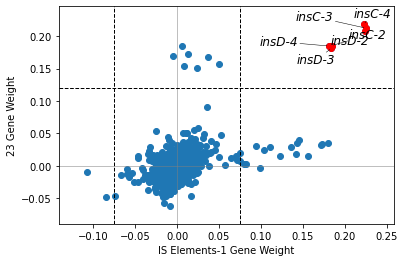

In [82]:
compare_gene_weights(ica_data=precise1k, imodulon1='IS Elements-1',
                     ica_data2=ica_data_1k36, imodulon2=23)

In [83]:
ica_data_1k36.rename_imodulons({23:'IS Elements-1'})

### iM 127

In [84]:
ica_data_1k36.view_imodulon(127).sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b2352,0.222605,yfdI,yfdI,CPS-53 (KpLE1) prophage%3B serotype specific g...,No COG annotation,NaN,P76507,2469131,2470462,+,...,True,True,56.0,228.0,True,True,6.958225,5.637611,1.849634,True
b2642,0.190303,yfjW,yfjW,CP4-57 prophage%3B uncharacterized protein YfjW,No COG annotation,ppGpp,P52138,2773318,2775021,+,...,True,False,NaN,NaN,False,True,4.585916,3.618335,1.492959,True
b4345,0.161971,mcrC,mcrC,5-methylcytosine-specific restriction enzyme s...,Defense mechanisms,NaN,P15006,4576912,4577958,-,...,False,False,NaN,NaN,False,True,3.589737,2.947491,1.245067,True
b3622,0.135166,waaL,rfaL;waaL,O-antigen ligase,Cell wall/membrane/envelope biogenesis,"RpoD,RpoH,RpoE",P27243,3796948,3798207,+,...,False,False,NaN,NaN,False,True,6.352353,5.554878,1.239433,True
b2370,0.125650,evgS,evgS,sensory histidine kinase EvgS,Signal transduction mechanisms,"RpoD,RpoS,ppGpp,EvgA,H-NS",P30855,2484374,2487967,+,...,False,False,NaN,NaN,False,True,5.484452,4.142882,1.435891,True
b2351,0.116271,yfdH,yfdH,CPS-53 (KpLE1) prophage%3B bactoprenol glucosy...,Cell wall/membrane/envelope biogenesis,NaN,P77293,2468214,2469134,+,...,True,True,1.0,185.0,True,True,7.562260,7.188983,0.968965,True
b2848,0.110351,yqeJ,yqeJ,protein YqeJ,No COG annotation,Nac,Q46943,2989304,2989786,+,...,True,False,NaN,NaN,False,True,1.829747,1.732598,0.905622,False
b4346,0.100103,mcrB,mcrB;rglB,5-methylcytosine-specific restriction enzyme s...,"Replication, recombination and repair",Nac,P15005,4577958,4579337,-,...,False,False,NaN,NaN,False,True,5.094652,4.709887,0.976298,False
b4253,0.096425,yjgL,yjgL,protein YjgL,No COG annotation,ppGpp,P39336,4475437,4477251,+,...,True,False,NaN,NaN,False,True,2.964702,3.272419,1.188679,True
b4279,0.087756,yjhB,yjhB,putative sialic acid transporter,Inorganic ion transport and metabolism,"RpoH,NanR,NanR,RpoH",P39352,4504058,4505275,+,...,True,False,NaN,NaN,False,True,3.004207,3.361446,0.967831,True


In [85]:
ica_data_1k36.rename_imodulons({127:'UC-11'})

### iM 198

In [86]:
ica_data_1k36.view_imodulon(198).sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b1496,0.280953,yddA,yddA,ABC transporter family protein YddA,Inorganic ion transport and metabolism,NaN,P31826,1577657,1579342,-,...,True,False,NaN,NaN,False,True,2.428001,2.514479,1.839885,True
b1495,0.277218,yddB,yddB,putative TonB-dependent receptor,Inorganic ion transport and metabolism,NaN,P31827,1575247,1577619,-,...,True,False,NaN,NaN,False,True,3.625822,3.214873,1.587800,True
b1494,0.233809,pqqL,pqqL;yddC,putative zinc peptidase,Function unknown,"YfeC,oxyS",P31828,1572407,1575202,-,...,True,False,5.0,NaN,True,True,3.848423,3.535214,1.186290,True


In [87]:
ica_data_1k36.rename_imodulons({198:'yddABC'})

### iM 222

In [88]:
# iM 222 contains genes reported to be regulated by yciT
# Gao et al., doi: 10.1093/nar/gkab735

In [89]:
ica_data_1k36.view_imodulon(222)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0821,0.319585,ybiU,ybiU,DUF1479 domain-containing protein YbiU,Function unknown,"YidZ,ArcA",P75791,857796,859061,-,...,True,False,31.0,NaN,True,True,5.883269,4.509838,1.056242,False
b0822,0.124266,ybiV,ybiV;supH,sugar phosphatase,Function unknown,YciT,P75792,859213,860028,-,...,False,True,76.0,175.0,True,True,6.628598,5.853495,0.807757,True
b0823,0.124164,ybiW,ybiW,putative pyruvate formate lyase,Energy production and conversion,NaN,P75793,860174,862606,-,...,True,False,NaN,NaN,False,True,1.948757,1.977912,0.485634,False
b0824,0.211949,ybiY,ybiY,putative pyruvate formate-lyase activating enz...,"Post-translational modification, protein turno...",YciT,P75794,862612,863511,-,...,True,False,NaN,NaN,False,True,0.122902,0.672783,0.449551,False
b1284,-0.237146,yciT,yciT,putative DNA-binding transcriptional regulator...,Transcription,"RpoS,Lrp",P76034,1343597,1344346,-,...,True,True,83.0,253.0,True,True,6.591231,6.778667,0.589467,False


In [90]:
ica_data_1k36.rename_imodulons({222:'YciT'})

### iM 233

In [91]:
ica_data_1k36.view_imodulon(233).sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0805,0.279455,fiu,fiu;ybiL,putative iron siderophore outer membrane trans...,Inorganic ion transport and metabolism,"RpoD,Fur,Crp,rybB",P75780,839249,841531,-,...,False,True,129.5,514.0,True,True,6.383400,4.592012,2.194376,True
b0804,0.236227,ybiX,ybiX,PKHD-type hydroxylase YbiX,Function unknown,NaN,P75779,838530,839207,-,...,True,False,11.5,NaN,True,True,4.817515,3.677785,1.357584,True
b0803,0.154984,ybiI,ybiI,zinc finger domain-containing protein YbiI,Signal transduction mechanisms,"RpoS,Lrp",P41039,838190,838456,-,...,True,False,3.0,NaN,True,True,5.223423,4.695483,1.306778,True
b0597,-0.123649,entH,entH;ybdB,proofreading thioesterase in enterobactin bios...,"Secondary metabolites biosynthesis, transport,...","RpoD,ryhB,Crp,Fur",P0A8Y8,629300,629713,+,...,False,False,18.0,NaN,True,True,5.807065,5.240372,1.452032,True
b0595,-0.134830,entB,entB;entG,enterobactin synthase component B,"Secondary metabolites biosynthesis, transport,...","RpoD,ryhB,Crp,Fur",P0ADI4,627694,628551,+,...,False,True,161.5,360.0,True,True,5.947376,5.332772,1.641641,True


In [92]:
ica_data_1k36.rename_imodulons({233:'ybiIXL'})

### iM 234

In [93]:
ica_data_1k36.view_imodulon(234)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0733,0.212154,cydA,cydA;cyd-1,cytochrome bd-I ubiquinol oxidase subunit I,Energy production and conversion,"RpoD,ryhB,YidZ,ArcA,Cra,H-NS,HypT,Fnr,Nac",P0ABJ9,771458,773026,+,...,False,True,588.5,1556.0,True,True,7.826489,8.285217,1.072910,True
b0734,0.227604,cydB,cydB;cyd-2,cytochrome bd-I ubiquinol oxidase subunit II,Energy production and conversion,"RpoD,ArcA,Cra,H-NS,HypT,Fnr",P0ABK2,773042,774181,+,...,False,True,66.0,1058.0,True,True,7.736589,8.192824,0.959473,True
b0735,0.223365,ybgE,ybgE,cyd operon protein YbgE,Function unknown,Nac,P0AAV0,774309,774602,+,...,True,False,NaN,NaN,False,True,6.140344,7.543778,0.940544,False
b4515,0.283746,cydX,cydX;ybgT,cytochrome bd-I ubiquinol oxidase subunit CydX,Function unknown,NaN,P56100,774196,774309,+,...,False,False,NaN,NaN,False,True,6.118117,7.901982,1.197361,True


In [94]:
ica_data_1k36.rename_imodulons({234:'cydABX'})

# Save final results

In [96]:
save_to_json(ica_data_1k36, '../jsons/precise1k36.json')
ica_data_1k36.imodulon_table.to_csv("../precise1k36_iM_table.csv")

# Generating Stationary phase ICA objects

## All stationary phase samples

In [97]:
#M matrix renamed as S matrix
#List stationaryiM samples
stationary_samples = ica_data_1k36.sample_table[ica_data_1k36.sample_table.study=='Stationary_phase'].index
#creating a new ICA object
ica_data_1k36_stationary = IcaData(M = ica_data_1k36.M,
                   A = ica_data_1k36.A[stationary_samples],
                   X = ica_data_1k36.X[stationary_samples],
                   log_tpm = ica_data_1k36.log_tpm[stationary_samples],
                   gene_table = ica_data_1k36.gene_table,
                   sample_table = ica_data_1k36.sample_table.loc[stationary_samples],
                   trn = ica_data_1k36.trn,
                dagostino_cutoff=ica_data_1k36.dagostino_cutoff,
                  )

In [98]:
save_to_json(ica_data_1k36_stationary, '../jsons/precise1k36_stationary.json')

## Sample grouping

In [99]:
# Labeling dictionary

group_dict = pd.DataFrame(ica_data_1k36_stationary.sample_table[['condition','rep_id']])
for i in group_dict.index:
    condition= group_dict.loc[i,'condition']
    group_dict.loc[i,'time'] = condition.split('_')[2].replace("h","")
    
    if condition.split('_')[0]=='GlcM9':
        group_dict.loc[i,'med'] = "G"
        group_dict.loc[i,'med_time'] = "G_"+ group_dict.loc[i,'time']
    else:
        group_dict.loc[i,'med'] = condition.split('-')[0]
        group_dict.loc[i,'med_time'] = condition.split('-')[0]+"_"+ group_dict.loc[i,'time']
group_dict['rep_id'] = group_dict['rep_id'].astype("int32")
group_dict['time'] = group_dict['time'].astype("int32")

color_dict = {
    3:'black',
    4:'green',
    6:'yello',
    8:'blue',
    12:'red',
    24:'orange',
}

color_scale_dict = {
    3:1,
    4:2,
    6:3,
    8:4,
    12:5,
    24:6,
}

for i in group_dict.index:
    group_dict.loc[i, 'color'] = color_dict.get( group_dict.loc[i, 'time'] )
    group_dict.loc[i, 'color_num'] = color_scale_dict.get(group_dict.loc[i, 'time'] )
group_dict.color_num = group_dict.color_num.astype("int32")

## Glucose only

In [100]:
G_iM_only  = IcaData(M = ica_data_1k36.M,
                   A = ica_data_1k36.A[group_dict[group_dict.med=='G'].index],
                   X = ica_data_1k36.X[group_dict[group_dict.med=='G'].index],
                  gene_table = ica_data_1k36.gene_table,
                   sample_table = new_sample_table,
                   imodulon_table = ica_data_1k36.imodulon_table,
                    trn=ica_data_1k36.trn,
                    dagostino_cutoff=ica_data_1k36.dagostino_cutoff,
                    thresholds = ica_data_1k36.thresholds,
                    gene_links = ica_data_1k36.gene_links,
                    tf_links = ica_data_1k36.tf_links
                  )

## Nitrogen only

In [101]:
N_iM_only  = IcaData(M = ica_data_1k36.M,
                   A = ica_data_1k36.A[group_dict[group_dict.med=='N'].index],
                   X = ica_data_1k36.X[group_dict[group_dict.med=='N'].index],
                  gene_table = ica_data_1k36.gene_table,
                   sample_table = new_sample_table,
                   imodulon_table = ica_data_1k36.imodulon_table,
                    trn=ica_data_1k36.trn,
                    dagostino_cutoff=ica_data_1k36.dagostino_cutoff,
                    thresholds = ica_data_1k36.thresholds,
                    gene_links = ica_data_1k36.gene_links,
                    tf_links = ica_data_1k36.tf_links
                  )

## Sulfur only

In [102]:
S_iM_only  = IcaData(M = ica_data_1k36.M,
                   A = ica_data_1k36.A[group_dict[group_dict.med=='S'].index],
                   X = ica_data_1k36.X[group_dict[group_dict.med=='S'].index],
                  gene_table = ica_data_1k36.gene_table,
                   sample_table = new_sample_table,
                   imodulon_table = ica_data_1k36.imodulon_table,
                    trn=ica_data_1k36.trn,
                    dagostino_cutoff=ica_data_1k36.dagostino_cutoff,
                    thresholds = ica_data_1k36.thresholds,
                    gene_links = ica_data_1k36.gene_links,
                    tf_links = ica_data_1k36.tf_links
                  )

In [103]:
save_to_json(G_iM_only, "../jsons/G_iM_only.json")
save_to_json(N_iM_only, "../jsons/N_iM_only.json")
save_to_json(S_iM_only, "../jsons/S_iM_only.json")

## Infered PRECISE-1K activity

In [104]:
from pymodulon.util import infer_activities

In [105]:
activities = infer_activities(precise1k,ica_data_1k36_stationary.X)
activities.head()

/opt/anaconda3/envs/pymodulon/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


,p1k_01056,p1k_01057,p1k_01058,p1k_01059,p1k_01060,p1k_01061,p1k_01062,p1k_01063,p1k_01064,p1k_01065,...,p1k_01082,p1k_01083,p1k_01084,p1k_01085,p1k_01086,p1k_01087,p1k_01088,p1k_01089,p1k_01090,p1k_01091
Sugar Diacid,1.461693,1.305703,1.294786,0.775839,9.828888,10.451561,9.511473,6.320257,5.423193,5.629110,...,3.978219,2.606596,2.383434,3.196019,2.827625,2.627472,2.780509,1.983399,2.912432,6.362423
Translation,-7.710436,-6.082633,-9.574421,-8.187762,-24.605648,-33.084958,-26.300202,-22.228422,-15.483553,-18.936526,...,-28.519948,-21.229007,-21.766195,-29.058139,-23.659884,-21.756503,-23.007972,-21.309993,-18.002151,-27.952791
ygdT,2.389181,1.158334,1.978830,1.726466,1.049038,3.259561,1.128918,0.242810,1.730877,1.535582,...,3.269259,3.411730,4.349720,2.945668,3.517315,3.459894,2.849115,3.465856,2.944312,1.721357
OxyR,-1.324431,-1.173107,-1.545567,-1.742523,-1.359495,-1.647981,-1.857850,-1.532613,-1.329123,-1.426363,...,-0.829016,-2.085044,-2.471948,-0.814955,-1.007671,-1.984552,-1.403309,-1.116527,-0.409846,-1.566981
FlhDC-2,-3.849210,-5.012761,-7.924119,-7.287845,-5.884195,-5.769524,-5.034424,-6.101830,-1.264762,-2.513670,...,-8.274504,-7.492150,-7.691251,-7.889958,-7.968505,-7.907308,-7.924722,-7.938017,-8.294768,-7.314135


In [106]:
precise1k_infer  = IcaData(M = precise1k.M,
                   A = activities,
                   X = ica_data_1k36_stationary.X,
                  gene_table = precise1k.gene_table,
                   sample_table = ica_data_1k36_stationary.sample_table,
                   imodulon_table = precise1k.imodulon_table,
                    trn=precise1k.trn,
                    dagostino_cutoff=precise1k.dagostino_cutoff,
                    thresholds = precise1k.thresholds,
                    gene_links = precise1k.gene_links,
                    tf_links = precise1k.tf_links
                  )

In [107]:
explained_variance(precise1k_infer)

0.6995101080283554

In [108]:
rec_var = {}
for k in precise1k_infer.imodulon_names:
    rec_var[k] = explained_variance(precise1k_infer,imodulons=k)
df_rec_var = pd.Series(rec_var)
df_rec_var = df_rec_var.sort_values(ascending=False)

In [109]:
df_rec_var.head(20)

UC-8            0.043504
ppGpp           0.041699
Translation     0.033472
Pyrimidine      0.023528
gcvB            0.020681
Purine          0.019440
Sulfate         0.017881
UC-7            0.017406
Crp-1           0.016989
Lrp             0.016272
NtrC-3          0.015666
RpoS            0.014609
Arginine        0.014357
Cellulose       0.014025
UC-2            0.013291
Microaerobic    0.012980
ArcA            0.010930
Fnr-3           0.010669
Phage Shock     0.010455
Crp-2           0.010407
dtype: float64

In [110]:
save_to_json(precise1k_infer,"../jsons/precise1k_infer.json")